# **CS 4501 ML Semester Project**
Teddy Vallar, Dev Das, Rakshith Raghu

**1) Loading Data:**

In [1]:
import pandas as pd
import io
#from google.colab import files
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#uploaded = files.upload()


In [2]:
#Data sets:
csv_url = 'https://raw.githubusercontent.com/tvallar/Data_For_ML/master/Combined_Diabetes_and_Census_data.csv'

data = pd.read_csv(csv_url, encoding='iso-8859-1')
data['Ratio_Men'] = data['Men']/data['TotalPop']
data['Ratio_Women'] = data['Women']/data['TotalPop']

print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 44 columns):
Unnamed: 0                     3218 non-null int64
CountyId                       3218 non-null int64
State_x                        3218 non-null object
County_x                       3218 non-null object
TotalPop                       3218 non-null int64
Men                            3218 non-null int64
Women                          3218 non-null int64
Hispanic                       3218 non-null float64
White                          3218 non-null float64
Black                          3218 non-null float64
Native                         3218 non-null float64
Asian                          3218 non-null float64
Pacific                        3218 non-null float64
VotingAgeCitizen               3218 non-null int64
Income                         3218 non-null int64
IncomeErr                      3218 non-null int64
IncomePerCap                   3218 non-null int64
IncomePerCap

In [40]:
print(data.describe())

        Unnamed: 0      CountyId      TotalPop           Men         Women  \
count  3218.000000   3218.000000  3.218000e+03  3.218000e+03  3.218000e+03   
mean   1608.500000  31398.119640  1.008238e+05  4.961513e+04  5.120866e+04   
std     929.100909  16286.924134  3.245927e+05  1.593669e+05  1.652638e+05   
min       0.000000   1001.000000  7.400000e+01  3.900000e+01  3.500000e+01   
25%     804.250000  19033.500000  1.122300e+04  5.656250e+03  5.557000e+03   
50%    1608.500000  30024.000000  2.589700e+04  1.289600e+04  1.300400e+04   
75%    2412.750000  46106.500000  6.661275e+04  3.302175e+04  3.365925e+04   
max    3217.000000  72153.000000  1.010572e+07  4.979641e+06  5.126081e+06   

          Hispanic        White        Black       Native        Asian  \
count  3218.000000  3218.000000  3218.000000  3218.000000  3218.000000   
mean     11.301958    74.964295     8.687197     1.713611     1.290025   
std      19.347314    22.995839    14.336483     7.092037     2.716904   
m

In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [4]:
data.head()

,CountyId,State_x,County_x,TotalPop,Men,Women,Hispanic,White,Black,Native,...,PublicWork,SelfEmployed,FamilyWork,Unemployment,Number_of_Diabetes_Patients,Diabetes_Percentage,Latitude,Longitude,Ratio_Men,Ratio_Women
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,20.2,5.6,0.1,5.2,5144,13.0,32.536382,-86.644500,0.488753,0.511247
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,12.9,6.3,0.1,5.5,15367,10.4,30.659218,-87.746067,0.489413,0.510587
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,19.1,6.5,0.3,12.4,3813,18.4,31.870670,-85.405456,0.533415,0.466585
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,17.4,6.3,0.3,8.2,2557,14.8,33.015893,-87.127148,0.542560,0.457440
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,11.9,4.0,0.1,4.9,5990,14.1,33.977448,-86.567246,0.494043,0.505957


**2) Perform Data Processing**

Linear Regression by splitting data into National and Virginia Data Preprocessing

In [5]:
combined_data = data.copy()
combined_data.rename(columns={'number.9': 'Number_of_Diabetes_Patients', 'percent.9' : 'Diabetes_Percentage'}, inplace=True)
combined_data.head()

,CountyId,State_x,County_x,TotalPop,Men,Women,Hispanic,White,Black,Native,...,PublicWork,SelfEmployed,FamilyWork,Unemployment,Number_of_Diabetes_Patients,Diabetes_Percentage,Latitude,Longitude,Ratio_Men,Ratio_Women
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,20.2,5.6,0.1,5.2,5144,13.0,32.536382,-86.644500,0.488753,0.511247
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,12.9,6.3,0.1,5.5,15367,10.4,30.659218,-87.746067,0.489413,0.510587
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,19.1,6.5,0.3,12.4,3813,18.4,31.870670,-85.405456,0.533415,0.466585
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,17.4,6.3,0.3,8.2,2557,14.8,33.015893,-87.127148,0.542560,0.457440
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,11.9,4.0,0.1,4.9,5990,14.1,33.977448,-86.567246,0.494043,0.505957


In [6]:
trimmed_data =  combined_data.copy()
trimmed_data =  trimmed_data.dropna(axis=0)
train_data = trimmed_data.loc[trimmed_data['State_x'] != 'Virginia']
test_data = trimmed_data.loc[trimmed_data['State_x'] == 'Virginia']
train_data = train_data.drop(['CountyId', 'State_x', 'County_x'], axis=1)
test_data = test_data.drop(['CountyId', 'State_x', 'County_x'], axis=1)

In [15]:
y_train = train_data[['Diabetes_Percentage']]
y_test = test_data[['Diabetes_Percentage']]
X_train = train_data.drop('Diabetes_Percentage', axis=1)
X_test = test_data.drop('Diabetes_Percentage', axis=1)

Running Linear Regression

In [46]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression with all variables
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
#RMSE
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Coef of Determination: %.2f' % r2_score(y_test, y_pred))

#getMetrics(Y_test, y_pred)

Coefficients: 
 [[-1.20797271e-05  4.33291784e-05 -5.54087782e-05 -6.33638075e-02
  -4.74066855e-02 -2.89422880e-02 -3.19116608e-02 -6.02754917e-02
  -1.43533784e-01 -5.34182231e-06 -5.25100191e-05  4.86700200e-05
  -7.15249429e-06  1.57752153e-04 -1.44523203e-02  5.82084870e-02
   2.06077243e-01  1.69863708e-01  2.31558650e-01  1.98853211e-01
   2.63371745e-01 -5.00088297e-01 -5.71789277e-01 -5.46310470e-01
  -5.34442470e-01 -6.57512379e-01 -6.43608296e-01  9.22010607e-02
   2.10419339e-05 -6.36854167e-02 -3.58511417e-02  2.51112058e-02
  -6.44411833e-02  9.62561902e-02  1.85634219e-04 -7.41939449e+00
   7.41939449e+00]]
Mean squared error: 2.74
Root Mean squared error: 1.66
Coef of Determination: 0.44


Heat map of correlations for Race and Diabetes

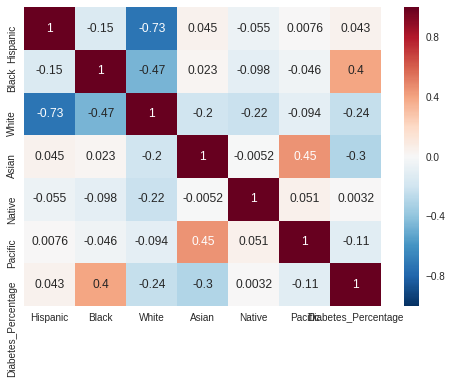

In [47]:
import seaborn as sns

f = (trimmed_data.loc[:, ['Hispanic', 'Black', 'White', 'Asian', 'Native','Pacific','Diabetes_Percentage']]).corr()

sns.heatmap(f, annot=True)
plt.show()

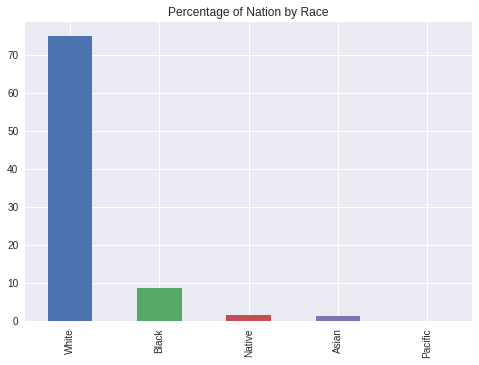

In [48]:
# Looking at nation by race
race_df = trimmed_data.copy()

race_columns = ['White','Black','Native','Asian','Pacific']
census_races =race_df[race_columns]

#There are more white people than black people as expected
(census_races.sum()/len(census_races)).plot.bar(title = "Percentage of Nation by Race")
plt.show()

In [49]:
corr_trimmed = trimmed_data.corr()
trimmed_data.corr()


,CountyId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Number_of_Diabetes_Patients,Diabetes_Percentage,Ratio_Men,Ratio_Women
CountyId,1.000000,-0.062276,-0.062755,-0.061801,0.342721,-0.164039,-0.159259,-0.020638,-0.107914,-0.062813,...,-0.060475,-0.095986,0.084885,0.050143,0.004512,0.099734,-0.058278,0.098354,-0.047836,0.047836
TotalPop,-0.062276,1.000000,0.999879,0.999887,0.115217,-0.191611,0.075199,-0.047050,0.459963,0.061361,...,0.997863,0.197977,-0.146670,-0.141520,-0.079429,0.008633,0.988947,-0.166426,-0.106537,0.106537
Men,-0.062755,0.999879,1.000000,0.999532,0.115594,-0.190630,0.072645,-0.046833,0.461103,0.063104,...,0.997744,0.197095,-0.145788,-0.141246,-0.079223,0.007764,0.987605,-0.168120,-0.102500,0.102500
Women,-0.061801,0.999887,0.999532,1.000000,0.114827,-0.192513,0.077646,-0.047249,0.458758,0.059665,...,0.997748,0.198782,-0.147487,-0.141751,-0.079609,0.009469,0.990014,-0.164753,-0.110407,0.110407
Hispanic,0.342721,0.115217,0.115594,0.114827,1.000000,-0.727064,-0.147061,-0.055198,0.045216,0.007630,...,0.104157,-0.169829,0.200846,0.013830,-0.055536,0.395677,0.110888,0.043327,0.014012,-0.014012
White,-0.164039,-0.191611,-0.190630,-0.192513,-0.727064,1.000000,-0.467479,-0.221684,-0.200498,-0.094391,...,-0.181418,0.224750,-0.393721,0.185459,0.104947,-0.568163,-0.200015,-0.237549,0.024012,-0.024012
Black,-0.159259,0.075199,0.072645,0.077646,-0.147061,-0.467479,1.000000,-0.097575,0.022882,-0.045693,...,0.071267,0.061757,0.120990,-0.303648,-0.117091,0.300037,0.101333,0.396695,-0.093251,0.093251
Native,-0.020638,-0.047050,-0.046833,-0.047249,-0.055198,-0.221684,-0.097575,1.000000,-0.005200,0.051265,...,-0.048107,-0.414304,0.464754,0.049594,0.081374,0.192381,-0.050486,0.003174,0.072455,-0.072455
Asian,-0.107914,0.459963,0.461103,0.458758,0.045216,-0.200498,0.022882,-0.005200,1.000000,0.452006,...,0.474658,0.128112,-0.049838,-0.160504,-0.087862,-0.068290,0.437133,-0.303965,-0.023552,0.023552
Pacific,-0.062813,0.061361,0.063104,0.059665,0.007630,-0.094391,-0.045693,0.051265,0.452006,1.000000,...,0.060629,-0.045123,0.057655,-0.004923,-0.005882,-0.022723,0.049725,-0.111631,0.052879,-0.052879


In [50]:
print(corr_trimmed['Diabetes_Percentage'].sort_values(ascending=False))

##Some Choices
#Races, Gender, Production, Drive, Employment/Unemployment, Income (correlated to healthyness of foods eaten), Median Commute, Walk
#We can convert these into habits and scale them based on some level
# like walking, if they walk x miles, then its x*k where k is a scalar that is the input for walk

Diabetes_Percentage            1.000000
ChildPoverty                   0.620781
Poverty                        0.577914
Unemployment                   0.497976
Black                          0.396695
Drive                          0.386022
Production                     0.344386
MeanCommute                    0.273908
Ratio_Women                    0.209252
PublicWork                     0.135759
Service                        0.126548
CountyId                       0.098354
Office                         0.085242
Hispanic                       0.043327
Construction                   0.034528
Carpool                        0.005410
Native                         0.003174
PrivateWork                   -0.049278
IncomePerCapErr               -0.053953
IncomeErr                     -0.066744
FamilyWork                    -0.070582
Pacific                       -0.111631
SelfEmployed                  -0.115151
Number_of_Diabetes_Patients   -0.117109
OtherTransp                   -0.154609


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

attributes = ['IncomePerCap', 'Unemployment', 'WorkAtHome', 'Walk', 'Professional', 'Ratio_Men', 'Ratio_Women', 'Drive', 'MeanCommute', 'Production', 'Diabetes_Percentage', 'White', 'Black']

#print(trimmed_data.columns)
data_selected = trimmed_data[attributes]
#print(trimmed_data.columns)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

train, test = train_test_split(data_selected, test_size=0.2)
X_train = num_pipeline.fit_transform(train.drop('Diabetes_Percentage', axis=1))
Y_train = train['Diabetes_Percentage']

X_test = num_pipeline.fit_transform(test.drop('Diabetes_Percentage',axis=1))
Y_test = test['Diabetes_Percentage']


In [72]:
# Linear Regression with all variables
regr = linear_model.SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.001, l1_ratio=0.15, fit_intercept=True, max_iter=None, 
                                 tol=None, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', 
                                 eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, 
                                 warm_start=False, average=False, n_iter=None)

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, y_pred))
#RMSE
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(Y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Coef of Determination: %.2f' % r2_score(Y_test, y_pred))

Coefficients: 
 [-1.0426904   0.5617211   0.09040831  0.1591265  -0.02648151 -0.19510973
  0.19510973  0.48167313  0.42083133  0.2974584   0.33388191  0.64602627]
Mean squared error: 3.30
Root Mean squared error: 1.82
Coef of Determination: 0.56


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [73]:
regr2 = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, 
                                max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, 
                                selection='cyclic')

# Train the model using the training sets
regr2.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = regr2.predict(X_test)

# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, y_pred))
#RMSE
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(Y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Coef of Determination: %.2f' % r2_score(Y_test, y_pred))

Coefficients: 
 [-0.48722796  0.28870281 -0.         -0.         -0.1003156  -0.
  0.          0.15182204  0.03793392  0.06088651 -0.          0.18900438]
Mean squared error: 4.86
Root Mean squared error: 2.20
Coef of Determination: 0.35


In [74]:
import sklearn.cluster

X_all = num_pipeline.fit_transform(data_selected)

kmeans = sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, 
                       max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, 
                       copy_x=True, n_jobs=None, algorithm='auto')

kmeans.fit(X_all)
print(kmeans.score(X_all))

def graph_clusters(index_x, index_y, predictions, k, X):
    m = len(X)
    #color_choices 
    colors = ['bo','ro','go','co','mo', 'yo', 'ko', '#ff497a', '#ccff66' ,'#ff7a66']
    X_lists = []
    Y_lists = []
    assignments = predictions
    for i in range(k):
        X_lists.append([])
        Y_lists.append([])
    for i in range(m):
        c_n = assignments[i]
        X_lists[c_n].append(X[i][index_x])
        Y_lists[c_n].append(X[i][index_y])
        #X_lists.append(X[i][index_x])
        #Y_lists.append(X[i][index_y])
    for i in range(k):
    #test = mpl.colors.ListedColormap(colors)
        plt.plot(Y_lists[i], X_lists[i], colors[i], markersize=0.7, marker='o', linewidth=0, label='Cluster {0}'.format(i), alpha = 0.7)
    
    plt.title('K={0} Clusters graphed'.format(k))
    plt.legend(markerscale=3.0)
    plt.show()

preds = kmeans.predict(X_all)
print(preds)
#graph_clusters()

-19855.824733029032
[2 1 5 ... 6 6 6]


Rakshith Experiments


















In [7]:
##modification of the data set
#attributes chosen
attributes = ['IncomePerCap', 'Unemployment', 'WorkAtHome', 'Walk', 
'Professional', 'Ratio_Men', 'Ratio_Women', 'Drive', 'MeanCommute', 
'Production', 'White', 'Black','Hispanic','Diabetes_Percentage']

Decision Tree regression

In [8]:
#prepping data for regression

treeattributes = attributes.copy()
treeattributes.append('State_x')

treedata = trimmed_data[treeattributes]
trained_data = treedata.loc[treedata['State_x'] != 'Virginia']
tested_data = treedata.loc[treedata['State_x'] == 'Virginia']

trained_data = trained_data.drop('State_x', axis=1)
tested_data = tested_data.drop('State_x', axis=1)

treeattributes.remove('State_x')

ty_train = trained_data[['Diabetes_Percentage']]
ty_test = tested_data[['Diabetes_Percentage']]
tX_train = trained_data.drop('Diabetes_Percentage', axis=1)
tX_test = tested_data.drop('Diabetes_Percentage', axis=1)

tX_train.head()

,IncomePerCap,Unemployment,WorkAtHome,Walk,Professional,Ratio_Men,Ratio_Women,Drive,MeanCommute,Production,White,Black,Hispanic
0,27824,5.2,2.5,0.6,35.3,0.488753,0.511247,86.0,25.8,15.4,75.4,18.9,2.7
1,29364,5.5,5.6,0.8,35.7,0.489413,0.510587,84.7,27.0,10.8,83.1,9.5,4.4
2,17561,12.4,1.3,2.2,25.0,0.533415,0.466585,83.4,23.4,24.1,45.7,47.8,4.2
3,20911,8.2,1.5,0.3,24.4,0.542560,0.457440,86.4,30.0,22.4,74.6,22.0,2.4
4,22021,4.9,2.1,0.4,28.5,0.494043,0.505957,86.8,35.0,19.5,87.4,1.5,9.0


In [11]:
#chose not to use a pipeline so as to more easily inverse_transform using the standard scaler
tinputer = SimpleImputer(missing_values=np.nan, strategy='median')
tscaler = StandardScaler()

tinputer.fit(tX_train)
filled_X = tinputer.transform(tX_train)
tX = tscaler.fit_transform(filled_X)

filled_test = tinputer.transform(tX_test)
tX_test = tscaler.transform(filled_test)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

TreeRegressor = RandomForestRegressor(random_state = 42, max_depth = 8, 
                                      n_estimators=500, min_samples_split=2, max_features = 4)

TreeRegressor.fit(tX,np.ravel(ty_train))

predictions = TreeRegressor.predict(tX_test)

names = treeattributes.copy()
names.remove("Diabetes_Percentage")

print(names)
print(TreeRegressor.feature_importances_)

print("Mean squared error: %.2f"
      % mean_squared_error(predictions, ty_test))
#RMSE
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(predictions, ty_test)))
# Explained variance score: 1 is perfect prediction
print('Coef of Determination: %.2f' % r2_score(predictions, ty_test))


['IncomePerCap', 'Unemployment', 'WorkAtHome', 'Walk', 'Professional', 'Ratio_Men', 'Ratio_Women', 'Drive', 'MeanCommute', 'Production', 'White', 'Black', 'Hispanic']
[0.21621571 0.0740604  0.07301915 0.03926521 0.07878998 0.03662907
 0.03602511 0.06271439 0.04390841 0.04854735 0.04098703 0.1308679
 0.1189703 ]
Mean squared error: 2.54
Root Mean squared error: 1.59
Coef of Determination: 0.35


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

TreeRegressor = DecisionTreeRegressor(random_state = 42)

TreeRegressor.fit(tX,ty_train)

predictions = TreeRegressor.predict(tX_test)

names = treeattributes.copy()
names.remove("Diabetes_Percentage")

print(names)
print(TreeRegressor.feature_importances_)

print("Mean squared error: %.2f"
      % mean_squared_error(predictions, ty_test))
#RMSE
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(predictions, ty_test)))
# Explained variance score: 1 is perfect prediction
print('Coef of Determination: %.2f' % r2_score(predictions, ty_test))




['IncomePerCap', 'Unemployment', 'WorkAtHome', 'Walk', 'Professional', 'Ratio_Men', 'Ratio_Women', 'Drive', 'MeanCommute', 'Production', 'White', 'Black', 'Hispanic']
[0.30117691 0.04953704 0.03326372 0.07258018 0.04907477 0.02737726
 0.02956348 0.05896916 0.02974771 0.04374749 0.03678009 0.11146163
 0.15672058]
Mean squared error: 4.56
Root Mean squared error: 2.14
Coef of Determination: 0.29


In [52]:
#attempting to optimize treeregressor using hyperparameters
from sklearn.model_selection import GridSearchCV

#TreeOpt = DecisionTreeRegressor(criterion= "mse", splitter= "best", max_depth=10, min_samples_split=2, 
 #                               min_samples_leaf=8, min_weight_fraction_leaf=0.0, max_features=9, 
 #                               random_state=23, max_leaf_nodes=None, min_impurity_decrease=0.0, 
 #                               min_impurity_split=False, presort=False)
    
TreeOpt = DecisionTreeRegressor(criterion= "mse", splitter= "best", max_depth=10, min_samples_split=2, 
                                min_samples_leaf=8, min_weight_fraction_leaf=0.0, max_features=8, 
                                random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                min_impurity_split=False, presort=False)
TreeOpt.fit(tX,ty_train)
predictions = TreeOpt.predict(tX_test)


print(names)
print(TreeOpt.feature_importances_)

print("Mean squared error: %.2f" % mean_squared_error(predictions, ty_test))
#RMSE
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(predictions, ty_test)))
# Explained variance score: 1 is perfect prediction
print('Coef of Determination: %.2f' % r2_score(predictions, ty_test))



['IncomePerCap', 'Unemployment', 'WorkAtHome', 'Walk', 'Professional', 'Ratio_Men', 'Ratio_Women', 'Drive', 'MeanCommute', 'Production', 'White', 'Black', 'Hispanic']
[0.11904367 0.05557027 0.01023489 0.04277433 0.18417747 0.01296228
 0.0327983  0.05864365 0.01865608 0.02502142 0.01897473 0.29004452
 0.13109841]
Mean squared error: 3.23
Root Mean squared error: 1.80
Coef of Determination: 0.40


c:\python\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


Kmeans tests

In [247]:
##modification of the data set
#attributes chosen
attributes = ['IncomePerCap', 'Unemployment', 'WorkAtHome', 'Walk', 
'Professional', 'Ratio_Men', 'Ratio_Women', 'Drive', 'MeanCommute', 
'Production', 'White', 'Black','Hispanic','Diabetes_Percentage']

In [248]:
#data trimmed down to just attributes chosen
data_selected = combined_data[attributes]



#chose not to use a pipeline so as to more easily inverse_transform using the standard scaler
inputer = SimpleImputer(missing_values=np.nan, strategy='median')
scaler = StandardScaler()

inputer.fit(data_selected)
filled_X = inputer.transform(data_selected)
X_selected = scaler.fit_transform(filled_X)

In [249]:
import sklearn.cluster
from sklearn.metrics import silhouette_score



#X_selected = num_pipeline.fit_transform(data_selected)

kmeans = sklearn.cluster.KMeans(n_clusters=10, init='k-means++', n_init=10, 
                       max_iter=500, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, 
                       copy_x=True, n_jobs=None, algorithm='auto')

kmeans.fit(X_selected)
print(kmeans.score(X_selected))
print(silhouette_score(X_selected, kmeans.predict(X_selected)))


clusters = kmeans.cluster_centers_
clusters = scaler.inverse_transform(clusters)

cluster_df = pd.DataFrame(clusters, columns = attributes)
print(cluster_df)


-19006.02148713961
0.1567377709122583
   IncomePerCap  Unemployment  WorkAtHome       Walk  Professional  Ratio_Men  \
0  22976.793309      6.989486    3.499522   1.986619     26.950060   0.497999   
1  28198.687755      6.227551    4.212857   1.847347     34.091633   0.490880   
2  10401.675000     18.896250    2.063750   3.408750     29.035000   0.482300   
3  38979.732759      5.262931    6.050000   2.752586     44.397845   0.492462   
4  32012.541667      8.133333    6.070833  34.191667     31.508333   0.541222   
5  27639.902158      4.333525    5.667338   4.200000     32.922302   0.502511   
6  19717.370370      7.207407    4.139815   2.656481     28.131481   0.589518   
7  22491.247934      7.688843    4.550826   2.969008     27.901240   0.506423   
8  20924.585075      9.578507    2.610448   1.726567     27.772836   0.486016   
9  29200.731429      4.128000   12.432000   9.069143     38.196000   0.507045   

   Ratio_Women      Drive  MeanCommute  Production      White      Bla

In [385]:
#ATTEMPT at hiearchical clustering, results from this are probably not useful. 

from sklearn.cluster import MeanShift

clustering = MeanShift(bandwidth = 4)
clustering.fit(X_selected)

centers = pd.DataFrame(scaler.inverse_transform(clustering.cluster_centers_), columns = attributes)

In [386]:
print(centers)

    IncomePerCap  Unemployment  WorkAtHome       Walk  Professional  \
0   25958.544000      6.081400    4.459680   2.646640     31.056520   
1   13374.821053     15.092632    2.607368   2.744211     28.646316   
2   26171.000000     12.750000    5.012500  28.900000     33.287500   
3   28593.250000      8.425000    3.225000   7.475000     34.750000   
4   14310.500000     27.850000   25.350000   4.950000     47.200000   
5   69529.000000      6.200000    6.700000  20.400000     60.000000   
6   59508.000000      5.400000    6.700000  11.100000     55.000000   
7   50832.000000      8.000000    5.700000  13.200000     61.700000   
8   48777.000000      9.500000    2.300000  49.700000     31.900000   
9   46024.000000      0.000000    6.300000  40.600000     22.200000   
10  39376.000000      7.900000    6.500000  37.200000     29.700000   
11  35998.000000      1.900000    0.700000  41.600000     17.400000   
12  33472.000000     26.300000    6.100000   6.100000     30.700000   
13  33

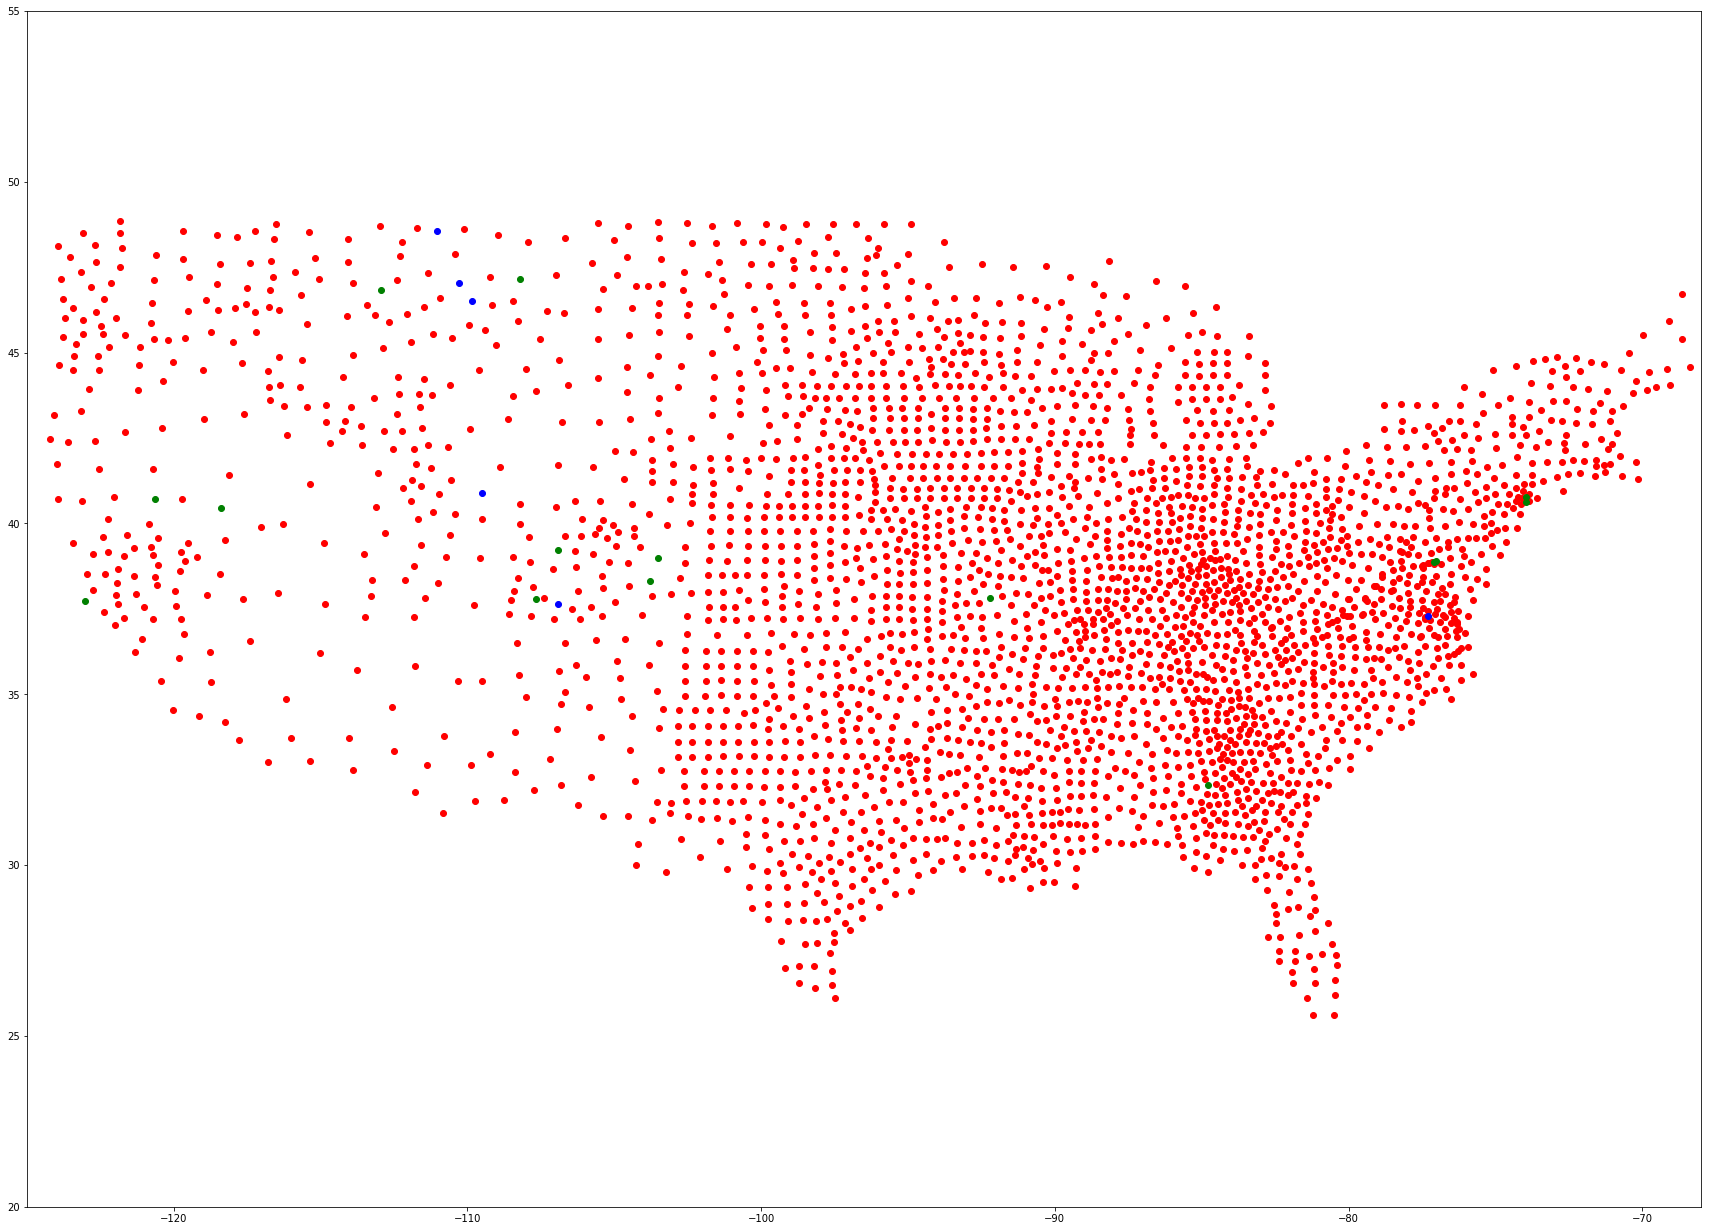

In [377]:
#attempting visualizations of the data
allattributes = attributes.copy()
allattributes.append('County_x')
allattributes.append('Longitude')
allattributes.append('Latitude')
allattributes.append('TotalPop')

all_data = combined_data[vaattributes]
county_data = all_data[['County_x','Longitude','Latitude','MeanCommute','TotalPop','Diabetes_Percentage']]

all_data = all_data.drop("State_x",axis = 1)
all_data = all_data.drop("County_x",axis = 1)
all_data = all_data.drop("Longitude",axis = 1)
all_data = all_data.drop("Latitude",axis = 1)
all_data = all_data.drop("TotalPop",axis = 1)

all_data = inputer.transform(all_data)
all_data = scaler.transform(all_data)

#predictions = kmeans.predict(all_data)
predictions = clustering.predict(all_data)
allstates = scaler.inverse_transform(all_data)
allstates = pd.DataFrame(allstates, columns = attributes)





plt.rcParams["figure.figsize"] = (30,22)
plt.xlim(-125, -68)
plt.ylim(20, 55)
#plt.ylim(0,30)


for i in range(25):
    if(i in [0,2,6,10,11]): #1,4,21,25
        plt.plot(county_data[predictions==i]["Longitude"], county_data[predictions==i]["Latitude"], "ro", label="Cluster 0", alpha=1)
    else:
        if(i in [1,4,5,7,9]):
            plt.plot(county_data[predictions==i]["Longitude"], county_data[predictions==i]["Latitude"], "go", label="Cluster 0", alpha=1)
        else:
#            if(i in [0,9,19,23,12,15]): #12,15
#                plt.plot(county_data[predictions==i]["Longitude"], county_data[predictions==i]["Latitude"], "mo", label="Cluster 0", alpha=1)
#            else:    
            plt.plot(county_data[predictions==i]["Longitude"], county_data[predictions==i]["Latitude"], "bo", label="Cluster 0", alpha=1)


#plt.plot(county_data[predictions==0]["Longitude"], county_data[predictions==0]["Latitude"], "ro", label="Cluster 0", alpha=1)
#plt.plot(county_data[predictions==1]["Longitude"], county_data[predictions==1]["Latitude"], "ro", label="Cluster 1", alpha=1)
#plt.plot(county_data[predictions==2]["Longitude"], county_data[predictions==2]["Latitude"], "ro", label="Cluster 2", alpha=1)
#plt.plot(county_data[predictions==3]["Longitude"], county_data[predictions==3]["Latitude"], "bo", label="Cluster 3", alpha=1)
#plt.plot(county_data[predictions==4]["Longitude"], county_data[predictions==4]["Latitude"], "go", label="Cluster 4", alpha=1)
#plt.plot(county_data[predictions==5]["Longitude"], county_data[predictions==5]["Latitude"], "bo", label="Cluster 5", alpha=1)
#plt.plot(county_data[predictions==6]["Longitude"], county_data[predictions==6]["Latitude"], "ro", label="Cluster 6", alpha=1)
#plt.plot(county_data[predictions==7]["Longitude"], county_data[predictions==7]["Latitude"], "bo", label="Cluster 7", alpha=1)
#plt.plot(county_data[predictions==8]["Longitude"], county_data[predictions==8]["Latitude"], "ro", label="Cluster 8", alpha=1)#plt.plot(county_data[predictions==9]["Longitude"], county_data[predictions==9]["Latitude"], "bo", label="Cluster 9", alpha=1)
#plt.xlabel("Longitude", fontsize=14)
#plt.ylabel("Latitude", fontsize=14)
#plt.legend(loc="upper right", fontsize=20)
plt.show()

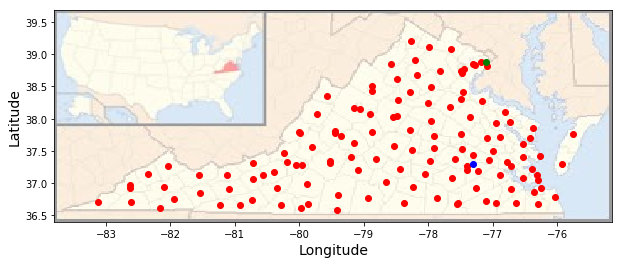

In [383]:
import matplotlib.image as mpimg

#visualizing just virginia classes
vaattributes = attributes.copy()
vaattributes.append('State_x')
vaattributes.append('County_x')
vaattributes.append('Longitude')
vaattributes.append('Latitude')
vaattributes.append('TotalPop')

va_data = combined_data[vaattributes]

va_data = va_data.loc[va_data['State_x'] == 'Virginia']
county_data = va_data[['County_x','Longitude','Latitude','TotalPop','Diabetes_Percentage']]

va_data = va_data.drop("State_x",axis = 1)
va_data = va_data.drop("County_x",axis = 1)
va_data = va_data.drop("Longitude",axis = 1)
va_data = va_data.drop("Latitude",axis = 1)
va_data = va_data.drop("TotalPop",axis = 1)

va_data = inputer.transform(va_data)
va_data = scaler.transform(va_data)

#predictions = kmeans.predict(va_data)
predictions = clustering.predict(va_data)
allstates = scaler.inverse_transform(va_data)
allstates = pd.DataFrame(allstates, columns = attributes)



#chose not to use a pipeline so as to more easily inverse_transform using the standard scaler
vafilled = inputer.transform(va_data)
va_data = scaler.transform(va_data)

#mpimg.imread(filename, 0)
plt.rcParams["figure.figsize"] = (10,6)
virginia_img= mpimg.imread('virginia.png')
plt.imshow(virginia_img, extent=[-83.8, -75.14, 36.4, 39.69], alpha=0.4,
           cmap=plt.get_cmap("jet")) #76.4   #36.4, 39.69


for i in range(25):
    if(i in [0,2,6,10,11]): #1,4,21,25
        plt.plot(county_data[predictions==i]["Longitude"], county_data[predictions==i]["Latitude"], "ro", label="Cluster 0", alpha=1)
    else:
        if(i in [1,4,5,7,9]):
            plt.plot(county_data[predictions==i]["Longitude"], county_data[predictions==i]["Latitude"], "go", label="Cluster 0", alpha=1)
        else:
#            if(i in [0,9,19,23,12,15]): #12,15
#                plt.plot(county_data[predictions==i]["Longitude"], county_data[predictions==i]["Latitude"], "mo", label="Cluster 0", alpha=1)
#            else:    
            plt.plot(county_data[predictions==i]["Longitude"], county_data[predictions==i]["Latitude"], "bo", label="Cluster 0", alpha=1)




#plt.plot(county_data[predictions==0]["Longitude"], county_data[predictions==0]["Latitude"], "ro", label="Cluster 0", alpha=.7)
#plt.plot(county_data[predictions==1]["Longitude"], county_data[predictions==1]["Latitude"], "bo", label="Cluster 1", alpha=.5)
#plt.plot(county_data[predictions==2]["Longitude"], county_data[predictions==2]["Latitude"], "ro", label="Cluster 2", alpha=.5)
#plt.plot(county_data[predictions==3]["Longitude"], county_data[predictions==3]["Latitude"], "bo", label="Cluster 3", alpha=.7)
#plt.plot(county_data[predictions==4]["Longitude"], county_data[predictions==4]["Latitude"], "go", label="Cluster 4", alpha=1)
#plt.plot(county_data[predictions==5]["Longitude"], county_data[predictions==5]["Latitude"], "bo", label="Cluster 5", alpha=.7)
#plt.plot(county_data[predictions==6]["Longitude"], county_data[predictions==6]["Latitude"], "bo", label="Cluster 6", alpha=.5)
#plt.plot(county_data[predictions==7]["Longitude"], county_data[predictions==7]["Latitude"], "bo", label="Cluster 7", alpha=.7)
#plt.plot(county_data[predictions==8]["Longitude"], county_data[predictions==8]["Latitude"], "ro", label="Cluster 8", alpha=.5)
#plt.plot(county_data[predictions==9]["Longitude"], county_data[predictions==9]["Latitude"], "bo", label="Cluster 9", alpha=.7)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.show()


In [384]:
print(county_data[predictions==1])
print(county_data[predictions==4])
print(county_data[predictions==5])
print(county_data[predictions==7])
print(county_data[predictions==9])

Empty DataFrame
Columns: [County_x, Longitude, Latitude, TotalPop, Diabetes_Percentage]
Index: []
              County_x  Longitude   Latitude  TotalPop  Diabetes_Percentage
2824  Arlington County -77.100703  38.878337    229534                  4.2
Empty DataFrame
Columns: [County_x, Longitude, Latitude, TotalPop, Diabetes_Percentage]
Index: []
Empty DataFrame
Columns: [County_x, Longitude, Latitude, TotalPop, Diabetes_Percentage]
Index: []
Empty DataFrame
Columns: [County_x, Longitude, Latitude, TotalPop, Diabetes_Percentage]
Index: []


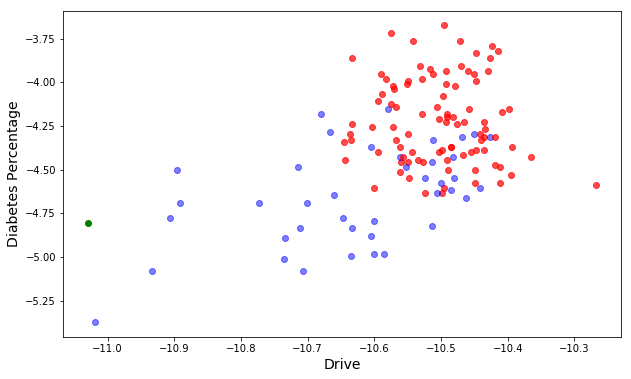

In [155]:
#random visualizations of just VA data, predictions made in upper cell

#showing attributes again here for memory's sake
attributes = ['IncomePerCap', 'Unemployment', 'WorkAtHome', 'Walk', 
'Professional', 'Ratio_Men', 'Ratio_Women', 'Drive', 'MeanCommute', 
'Production', 'White', 'Black','Hispanic', 'Diabetes_Percentage']

va_data = pd.DataFrame(va_data, columns = attributes)

plt.plot(va_data[predictions==0]["Drive"], va_data[predictions==0]["Diabetes_Percentage"], "ro", label="Cluster 0", alpha=.7)
plt.plot(va_data[predictions==1]["Drive"], va_data[predictions==1]["Diabetes_Percentage"], "bo", label="Cluster 1", alpha=.5)
plt.plot(va_data[predictions==2]["Drive"], va_data[predictions==2]["Diabetes_Percentage"], "bo", label="Cluster 2", alpha=.5)
plt.plot(va_data[predictions==3]["Drive"], va_data[predictions==3]["Diabetes_Percentage"], "ro", label="Cluster 3", alpha=.7)
plt.plot(va_data[predictions==4]["Drive"], va_data[predictions==4]["Diabetes_Percentage"], "go", label="Cluster 4", alpha=1)
plt.plot(va_data[predictions==5]["Drive"], va_data[predictions==5]["Diabetes_Percentage"], "rD", label="Cluster 5", alpha=.7)
plt.plot(va_data[predictions==6]["Drive"], va_data[predictions==6]["Diabetes_Percentage"], "bo", label="Cluster 6", alpha=.5)
plt.plot(va_data[predictions==7]["Drive"], va_data[predictions==7]["Diabetes_Percentage"], "ro", label="Cluster 7", alpha=.7)
plt.plot(va_data[predictions==8]["Drive"], va_data[predictions==8]["Diabetes_Percentage"], "bo", label="Cluster 8", alpha=.5)
plt.plot(va_data[predictions==9]["Drive"], va_data[predictions==9]["Diabetes_Percentage"], "ro", label="Cluster 9", alpha=.7)
plt.xlabel("Drive", fontsize=14)
plt.ylabel("Diabetes Percentage", fontsize=14)
plt.show()